### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import sys
import copy

In [2]:
%matplotlib inline

In [3]:
from funcs import matplotlib_imshow
from funcs import auto_canny
from funcs import find_contours
from funcs import get_canvas

## **Fitting Different Shapes to a Contour ([Docs](https://docs.opencv.org/4.7.0/dd/d49/tutorial_py_contour_features.html))**

### *Finding and Drawing Contours of Some Simple Shapes*

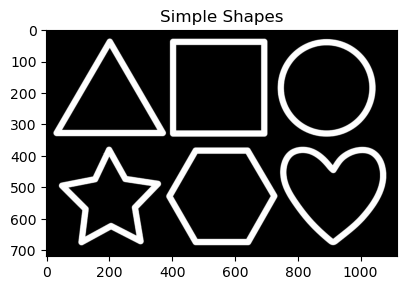

In [4]:
# read in the image
simple_shapes = cv.bitwise_not(cv.imread("./imgs/simple_shapes.png", 0))
matplotlib_imshow("Simple Shapes", simple_shapes)

In [5]:
# we need to apply canny edge detection or thresholding before finding contours
thresh_val, simple_shapes = cv.threshold(simple_shapes, 240, 255, cv.THRESH_BINARY)

In [6]:
# finding contours
simple_shapes_contours, hierarchy = cv.findContours(
    simple_shapes, mode=cv.RETR_EXTERNAL, method=cv.CHAIN_APPROX_SIMPLE
)

In [7]:
len(simple_shapes_contours)

6

**Note:** Without applying Canny edge detection or thresholding we got about 200 contours. After applying auto_canny we got about 1000 contours. And, after trying with Binaray thresholding we got only 6 contours. So, you need to experiment with different preprocessing techniques to ensure that the correct contours are detected.

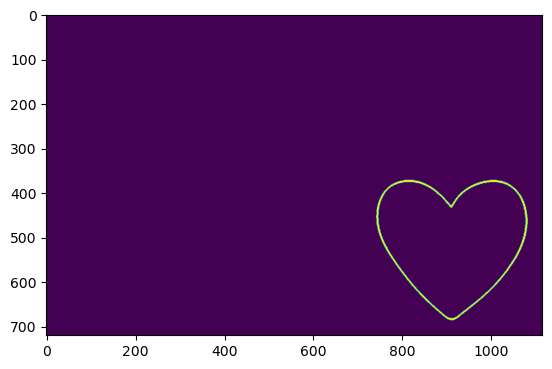

In [8]:
# drawing contours
canvas1 = get_canvas(simple_shapes.shape, color_code=(80))
plt.imshow(
    cv.drawContours(canvas1, simple_shapes_contours, 1, color=(200), thickness=4)
)

- ### Bounding Rectangles

#### *Straight Bounding Rectangle*

It is a straight rectangle and doesn't consider the rotation of the object. So area of the bounding rectangle won't be minimum.

The `cv.boundingRect(pts_ary)` function returns a tuple of 4 elements, x, y, w, h.
- (x,y): the top-left coordinate of the rectangle.
- (w,h): width and height of the rectangle. 

In [9]:
x, y, w, h = cv.boundingRect(simple_shapes_contours[1])

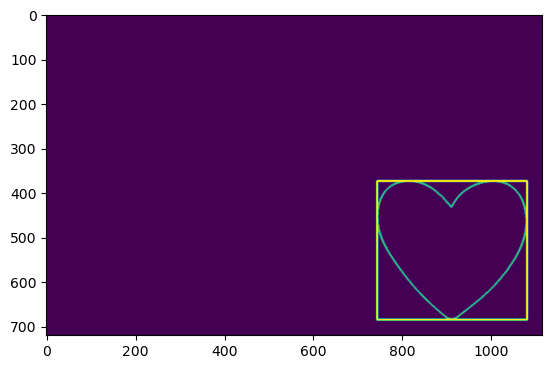

In [10]:
plt.imshow(cv.rectangle(canvas1, (x, y), (x + w, y + h), (255, 255, 255), 4))

#### *Rotated Bounding Rectangle*

The bounding rectangle is drawn with minimum area, so it considers the rotation also. But to draw this rectangle, we need 4 corners of the rectangle. It is obtained by the function cv.boxPoints()

The `cv.minAreaRect(pts_ary)` function: It returns a Box2D structure which contains following details,
- center (x,y) 
- (width, height)
- angle of rotation

The `cv.boxPoints(Box2D_obj)` function: It is used to convert the Box2D structure, returned by the cv.minAreaRect() function, to a rotation aware 4 point array where the points denote the rectangle corners. We need to use, cv.ploylines() to plot the rotated bounding box.

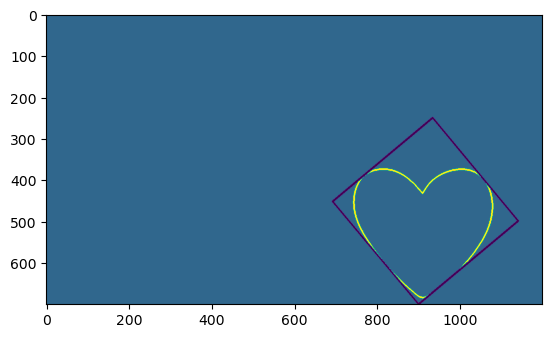

In [11]:
min_area_rect_box2d = cv.minAreaRect(simple_shapes_contours[1])
min_area_rect_corners = cv.boxPoints(min_area_rect_box2d).astype(np.int32)

canvas2 = get_canvas((700, 1200), color_code=(80))
cv.drawContours(canvas2, simple_shapes_contours, 1, color=(200), thickness=4)

plt.imshow(
    cv.polylines(
        canvas2, [min_area_rect_corners], isClosed=True, color=(20, 20), thickness=4
    )
)

- ### Minimum Enclosing Circle

The `cv.minEnclosingCircle(pts_ary)` function is used to find the cricle with minimum area that encloses the given set of points. It returns,
- (x, y): center of the circle
- radius of the circle

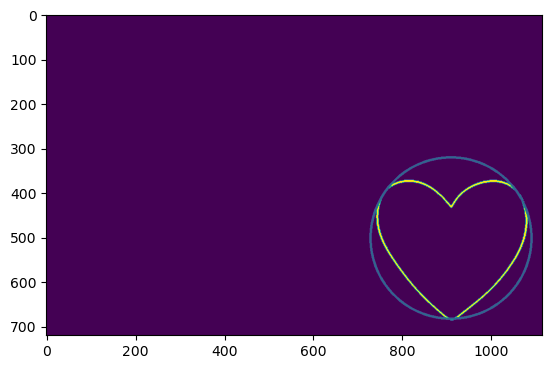

In [12]:
(x, y), radius = cv.minEnclosingCircle(simple_shapes_contours[1])

center = (int(x), int(y))
radius = int(radius)

canvas3 = get_canvas(simple_shapes.shape, color_code=(80))
cv.drawContours(canvas3, simple_shapes_contours, 1, color=(200), thickness=4)

plt.imshow(cv.circle(canvas3, center, radius, color=(120, 200), thickness=4))

- ### Fitting an Ellipse

The `cv.fitEllipse(pts_ary)` returns the rotated rectangle in which the ellipse is inscribed. 

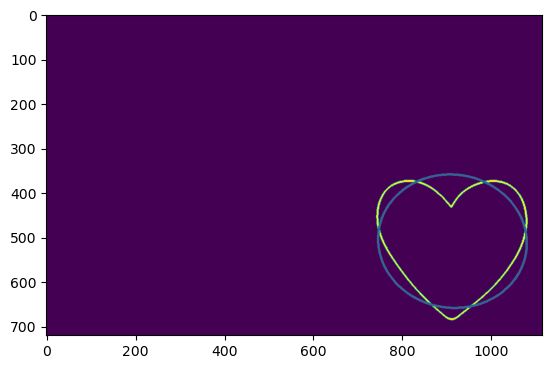

In [13]:
ellipse = cv.fitEllipse(simple_shapes_contours[1])

canvas4 = get_canvas(simple_shapes.shape, color_code=(80))
cv.drawContours(canvas4, simple_shapes_contours, 1, color=(200), thickness=4)

plt.imshow(cv.ellipse(canvas4, ellipse, color=(120, 200), thickness=4))

In [14]:
(x, y), (MA, ma), angle = cv.fitEllipse(simple_shapes_contours[1])

In [15]:
x, y, MA, ma, angle

(913.2462158203125,
 509.03021240234375,
 298.7832336425781,
 335.07757568359375,
 98.0836410522461)